In [42]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
import pandas as pd
from time import sleep
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException, ElementClickInterceptedException, StaleElementReferenceException
from selenium.webdriver.common.keys import Keys
import time
import csv
from selenium.common.exceptions import NoSuchElementException
from urllib.parse import urlparse, parse_qs
from webdriver_manager.chrome import ChromeDriverManager
from googleapiclient.discovery import build


### Question 1

In [21]:
def search_amazon(product, driver):
    driver.get("https://www.amazon.in")
    search_box = driver.find_element(By.ID, "twotabsearchtextbox")
    search_box.clear()
    search_box.send_keys(product)
    search_button = driver.find_element(By.ID, "nav-search-submit-button")
    search_button.click()
    time.sleep(3)

    products = driver.find_elements(By.XPATH, "//span[@class='a-size-medium a-color-base a-text-normal']")
    for index, product in enumerate(products, start=1):
        print(f"{index}: {product.text}")

if __name__ == "__main__":
    service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    
    while True:
        product_to_search = input("Enter the product you want to search on Amazon.in or 'quit' to exit: ")
        if product_to_search.lower() == 'quit':
            driver.quit()
            break
        search_amazon(product_to_search, driver)

Enter the product you want to search on Amazon.in or 'quit' to exit:  Shoes
Enter the product you want to search on Amazon.in or 'quit' to exit:  quit


### Question 2

In [23]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
import time

def search_and_scrape_amazon(product, driver):
    driver.get("https://www.amazon.in")
    
    search_box = driver.find_element(By.ID, "twotabsearchtextbox")
    search_box.clear()
    search_box.send_keys(product)
    search_button = driver.find_element(By.ID, "nav-search-submit-button")
    search_button.click()
    
    products_list = []
    
    for _ in range(3):
        time.sleep(3) 
        
        products = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")
        for product in products:
            try:
                name = product.find_element(By.XPATH, ".//span[@class='a-size-medium a-color-base a-text-normal']").text
            except NoSuchElementException:
                name = "-"
                
            try:
                price = product.find_element(By.XPATH, ".//span[@class='a-price-whole']").text
            except NoSuchElementException:
                price = "-"
            
            try:
                brand = product.find_element(By.XPATH, ".//span[@class='a-size-base-plus a-color-base']").text
            except NoSuchElementException:
                brand = "-"
                
            try:
                return_exchange = product.find_element(By.XPATH, ".//a[contains(text(),'Return')]").text
            except NoSuchElementException:
                return_exchange = "-"
            
            try:
                delivery = product.find_element(By.XPATH, ".//span[contains(text(),'Delivery')]").text
            except NoSuchElementException:
                delivery = "-"
            
            try:
                availability = product.find_element(By.XPATH, ".//span[contains(text(),'In stock')]").text
            except NoSuchElementException:
                availability = "Out of stock"  
            
            product_url = product.find_element(By.XPATH, ".//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']").get_attribute('href')
            
            product_details = {
                "Brand Name": brand,
                "Name of the Product": name,
                "Price": price,
                "Return/Exchange": return_exchange,
                "Expected Delivery": delivery,
                "Availability": availability,
                "Product URL": product_url
            }
            products_list.append(product_details)
        
        try:
            next_button = driver.find_element(By.XPATH, "//a[@class='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")
            next_button.click()
        except NoSuchElementException:
            break  
    
    return products_list

if __name__ == "__main__":
    service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    
    product_to_search = input("Enter the product you want to search on Amazon.in or 'quit' to exit: ")
    if product_to_search.lower() != 'quit':
        results = search_and_scrape_amazon(product_to_search, driver)
        driver.quit()
        
        df = pd.DataFrame(results)
        df.to_csv("amazon_products.csv", index=False)
        print("Data scraped successfully and saved to amazon_products.csv")


Enter the product you want to search on Amazon.in or 'quit' to exit:  Shoes


Data scraped successfully and saved to amazon_products.csv


### Question 3

Images for fruits:





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjFMkZSL1hpr26XrH9QtjNASgJLnLQt4djPTniV1coKp23n64ilR1x0phr&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAwVVyW9tqZiZ9S9CWVf4sZvxfLp93nA69A2Q4ZG0A2Nos5TN9qvaz_yeI&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTX5KRGcCgN3KJkHzf3TKwgiRTxDyeyytsYdDbGYYfqSxPkrbltW5rVEpai&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkkjzZFY54y0aBlIaEy9I3KM71k9omnzb1pRYSGCnjLRoMAeFTHZx8O1pe&s

Images for cars:





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxa8T9kClfiRHE8oy_chn55-5Xb-8x8dSODZ9Y-7rjF3xDgHcxq1JrhWrO&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgLDZ2HrYfgymZn17OSCVmy06r75BvoHceB9hxeDEuJitHiP3NH4yqXvkK&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS49GmJ-RvvfAH0S2Q2_G2xAjs-sDjT1cVX7f0RiyxSEIlaBEziMTof-Q8Z&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-6Hjo6SUF6ZoWhXLJ8bOx5LfvVkpQRDbntlEd_QKkBGDI-i0T2k0h4alA&s

Images for machine learning:




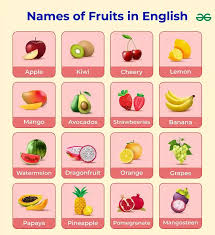
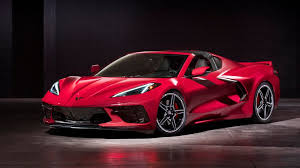
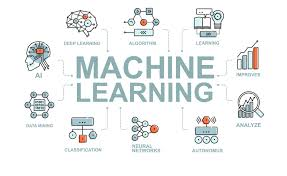
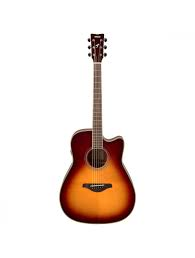
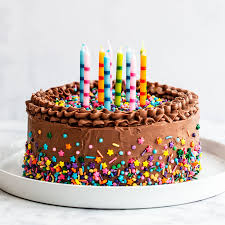

In [2]:
driver = webdriver.Chrome()

def scrape_images(search_query):
    driver.execute_script("window.open('');")
    driver.switch_to.window(driver.window_handles[-1])
    driver.get('https://images.google.com')

    input_box = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'q')))
    input_box.send_keys(search_query)
    input_box.send_keys(Keys.ENTER)

    WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "img[class*='YQ4gaf']")))
    images = driver.find_elements(By.CSS_SELECTOR, "img[class*='YQ4gaf']")[:10] 

    image_urls = [image.get_attribute('src') for image in images if image.get_attribute('src')]
    print(f"Images for {search_query}:")
    for url in image_urls:
        print(url)
    driver.close()
    driver.switch_to.window(driver.window_handles[0])

search_queries = ['fruits', 'cars', 'machine learning', 'Guitar', 'Cakes']

for query in search_queries:
    scrape_images(query)
driver.quit()


### Question 4

In [25]:
def scrape_flipkart_smartphones(search_query):
    service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    driver.get('https://www.flipkart.com')
    time.sleep(2)
    try:
        close_login_popup = driver.find_element(By.XPATH, "//button[@class='_2KpZ6l _2doB4z']")
        close_login_popup.click()
    except NoSuchElementException:
        print("No login popup")

    search_box = driver.find_element(By.NAME, 'q')
    search_box.send_keys(search_query)
    search_button = driver.find_element(By.CLASS_NAME, '_2iLD__')
    search_button.click()
    time.sleep(3)  

    products = driver.find_elements(By.CLASS_NAME, '_75nlfW')
    product_details = []

    for product in products:
        details = {'Brand Name': '-', 'Smartphone name': '-', 'Colour': '-', 'RAM': '-',
                   'Storage(ROM)': '-', 'Primary Camera': '-', 'Secondary Camera': '-', 
                   'Display Size': '-', 'Battery Capacity': '-', 'Price': '-', 'Product URL': '-'}

        try:
            title_container = product.find_element(By.CLASS_NAME, 'KzDlHZ')
            title_text = title_container.text
            details['Smartphone name'] = title_text.split('(')[0].strip()
            details['Colour'] = title_text.split('(')[1].split(',')[0]
            details['Product URL'] = product.find_element(By.TAG_NAME, 'a').get_attribute('href')
        except NoSuchElementException:
            pass

        specs = product.find_elements(By.CLASS_NAME, 'J+igdf')
        for spec in specs:
            text = spec.text
            if 'RAM' in text:
                details['RAM'] = text.split('|')[0].strip()
            if 'ROM' in text:
                details['Storage(ROM)'] = text.split('|')[0].strip()
            if 'Camera' in text and 'Rear' in text:
                details['Primary Camera'] = text
            if 'Front Camera' in text:
                details['Secondary Camera'] = text
            if 'Display' in text:
                details['Display Size'] = text
            if 'Battery' in text:
                details['Battery Capacity'] = text
            if 'Processor' in text:
                details['Processor'] = text

        try:
            price = product.find_element(By.CLASS_NAME, 'Nx9bqj _4b5DiR').text
            details['Price'] = price
        except NoSuchElementException:
            pass

        product_details.append(details)

    driver.quit()

    return product_details

if __name__ == "__main__":
    search_query = input("Enter the smartphone model to search on Flipkart: ")
    results = scrape_flipkart_smartphones(search_query)
    df = pd.DataFrame(results)
    df.to_csv("flipkart_smartphones.csv", index=False)
    print("Data scraped successfully and saved to flipkart_smartphones.csv")
    df

Enter the smartphone model to search on Flipkart:  Redmi Smartphone


No login popup
Data scraped successfully and saved to flipkart_smartphones.csv


### Question 5

In [28]:
service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)

def get_geospatial_coordinates(city_name):
    driver.get('https://www.google.com/maps')
    time.sleep(2)  

    try:
        search_box = driver.find_element(By.ID, 'searchboxinput')
        search_box.send_keys(city_name)
        search_box.submit()
        time.sleep(3)  
    except NoSuchElementException:
        print("Search box not found on Google Maps")
        return None

    current_url = driver.current_url
    parsed_url = urlparse(current_url)
    if '@' in parsed_url.path:
        coords = parsed_url.path.split('@')[1].split(',')[0:2]
        latitude, longitude = coords[0], coords[1]
        return latitude, longitude
    else:
        print("Coordinates not found in URL")
        return None

if __name__ == "__main__":
    city = input("Enter the city to search for: ")
    coordinates = get_geospatial_coordinates(city)
    if coordinates:
        print(f"Coordinates for {city}: {coordinates}")
    else:
        print(f"Could not find coordinates for {city}")

    driver.quit()

Enter the city to search for:  Pune


Coordinates for Pune: ('18.4844288', '73.9147776')


### Question 6

In [32]:
service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)
url = "https://www.digit.in/"
driver.get(url)
time.sleep(5)
try:
    laptops_menu = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.LINK_TEXT, 'Laptops'))
    )
    laptops_menu.click()

    gaming_laptops_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.PARTIAL_LINK_TEXT, 'Gaming Laptops'))
    )
    gaming_laptops_link.click()

except Exception as e:
    print(f"Error navigating on the site: {e}")
    driver.quit()

time.sleep(5)


laptop_elements = driver.find_elements(By.CSS_SELECTOR, '.list_woo.products .r_offer_details')

for laptop in laptop_elements:
    try:
        name = laptop.find_element(By.CSS_SELECTOR, 'h3 a').text

        operating_system = laptop.find_element(By.XPATH, ".//div[contains(text(),'Operating System:')]/following-sibling::span").text
        display_size = laptop.find_element(By.XPATH, ".//div[contains(text(),'Display Size :')]/following-sibling::span").text
        resolution = laptop.find_element(By.XPATH, ".//div[contains(text(),'Resolution :')]/following-sibling::span").text
        processor = laptop.find_element(By.XPATH, ".//div[contains(text(),'Processor :')]/following-sibling::span").text

        laptop_info = {
            'Name': name,
            'Operating System': operating_system,
            'Display Size': display_size,
            'Resolution': resolution,
            'Processor': processor
        }
        laptops.append(laptop_info)
    except Exception as e:
        print(f"Error processing an element: {e}")

with open('gaming_laptops.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Name', 'Operating System', 'Display Size', 'Resolution', 'Processor'])
    writer.writeheader()
    for laptop in laptops:
        writer.writerow(laptop)

for laptop in laptops:
    print(laptop)

driver.quit()

Error processing an element: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[contains(text(),'Operating System:')]/following-sibling::span"}
  (Session info: chrome=124.0.6367.60); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6637270C2+63090]
	(No symbol) [0x00007FF663692D12]
	(No symbol) [0x00007FF66352EC65]
	(No symbol) [0x00007FF66357499D]
	(No symbol) [0x00007FF663574ADC]
	(No symbol) [0x00007FF66356A0AC]
	(No symbol) [0x00007FF66359701F]
	(No symbol) [0x00007FF66356A00A]
	(No symbol) [0x00007FF6635971F0]
	(No symbol) [0x00007FF6635B3412]
	(No symbol) [0x00007FF663596D83]
	(No symbol) [0x00007FF6635683A8]
	(No symbol) [0x00007FF663569441]
	GetHandleVerifier [0x00007FF663B2262D+4238301]
	GetHandleVerifier [0x00007FF663B5F78D+4488509]
	GetHandleVerifier [0x00007FF663B57A6F+4456479]
	GetHandleVerifier [0x0

NameError: name 'laptops' is not defined

### Question 7

In [38]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import csv
import time

def setup_driver():
    service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    return driver

def scrape_billionaires(driver):
    url = "https://www.forbes.com/billionaires/"
    driver.get(url)
    time.sleep(5) 

    billionaires = []

    rows = driver.find_elements(By.XPATH, '//div[contains(@class,"table-row")]')

    for row in rows:
        try:
            rank = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[1]/div').text.strip()
            name = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[2]').text.strip()
            net_worth = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[3]/span').text.strip()
            age = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[4]/div').text.strip()
            citizenship = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[5]').text.strip()
            source = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[6]').text.strip()
            industry = row.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[1]/div[2]/div[7]').text.strip()

            billionaires.append({
                "Rank": rank,
                "Name": name,
                "Net Worth": net_worth,
                "Age": age,
                "Citizenship": citizenship,
                "Source": source,
                "Industry": industry
            })
        except Exception as e:
            print(f"Error in row: {e}")

    return billionaires

def save_to_csv(billionaires, filename='billionaires.csv'):
    keys = billionaires[0].keys()
    with open(filename, 'w', newline='') as file:
        dict_writer = csv.DictWriter(file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(billionaires)

def main():
    driver = setup_driver()
    try:
        billionaires_list = scrape_billionaires(driver)
        save_to_csv(billionaires_list)
        print("Data scraped and saved to CSV successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        driver.quit()

if __name__ == "__main__":
    main()


An error occurred: list index out of range


### Question 8

In [ ]:
def setup_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless') 
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    service = Service(executable_path=r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    return driver

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(5)

def scrape_youtube_comments(url, count):
    driver = setup_driver()
    driver.get(url)
    
    time.sleep(5) 

    try:
        consent_button = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div[2]/div/div/div/div/div[2]/form/div/span/span')
        consent_button.click()
    except:
        pass

    try:
        driver.find_element(By.TAG_NAME, 'ytd-comments')
    except Exception as e:
        print(f"Error loading comments: {e}")
        return []

    comments_data = []
    try:
        while len(comments_data) < count:
            scroll_down(driver)
            comments = driver.find_elements(By.XPATH, '//*[@id="content-text"]')
            upvotes = driver.find_elements(By.XPATH, '//*[@id="vote-count-middle"]')
            times = driver.find_elements(By.XPATH, '//*[@id="header-author"]/yt-formatted-string/a')
            comments_data = [
                {
                    'comment': comment.text,
                    'upvote': upvote.text,
                    'time': time.text.split('•')[1].strip() if '•' in time.text else time.text.strip()
                } for comment, upvote, time in zip(comments, upvotes, times) if comment.text != ''
            ]

    except Exception as e:
        print(f"Failed to scrape all comments: {e}")

    finally:
        driver.quit()
        return comments_data

if __name__ == "__main__":
    video_url = "https://www.youtube.com/watch?v=uJMCNJP2ipI"
    comments = scrape_youtube_comments(video_url, 500)
    print(comments[:10])


### Question 9

In [ ]:
url = 'https://www.hostelworld.com/'
chrome_options = Options()
chrome_options.add_experimental_option("detach",True)
chrome_driver_path = r"C:\Users\shant\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"
service = Service(executable_path=chrome_driver_path)

def comments_list(url):
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()
    driver.get(url)
    search = driver.find_element(By.XPATH)